# Using the Mueller module 


In this notebook, we demonstrate how to use the Mueller module, which defines the `MuellerMatrix` and `StokesVector` classes and various operations on them.

The first thing, of course, is to import the package and some other packages that we will be using. We will be creating some random matrices and vectors, so we need `random`, and we will be graphing a few things, so we need `maptplotlib.pyplot`.

In [1]:
from pySCATMECH.mueller import *
import random 
import matplotlib.pyplot as plt

## Mueller matrices

The class `MuellerMatrix` is used for handling Mueller matrices. Here we show several ways one can create a unit Mueller matrix. The `JonesMueller()` function converts a 2 x 2  complex Jones matrix into a Mueller matrix. And `MuellerUnit()` returns a unit Mueller matrix.

In [2]:
m1 = MuellerMatrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
m2 = MuellerMatrix([1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1])
m3 = MuellerMatrix(1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1)
m4 = JonesMueller([[1,0],[0,1]])
m5 = MuellerUnit()
print(m5)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


We can check to see that these are valid matrices. The `valid` method tests whether a Mueller matrix maps the set of valid Stokes vectors onto itself. The `physically_valid` method tests whether a Mueller matrix is a convex sum of Jones-Mueller matrices. The latter is a more stringent test of whether the matrix is realizable.

In [3]:
print(m1.valid())
print(m1.physically_valid())

True
True


But, a random matrix is not necessarily valid. In fact, it probably isn't!

In [4]:
# Returns a random number with a normal distribution...
ran = lambda : random.gauss(0,1)

# Create 20 random matrices...
m1 = [MuellerMatrix([[ran(), ran(), ran(), ran()],
                    [ran(), ran(), ran(), ran()],
                    [ran(), ran(), ran(), ran()],
                    [ran(), ran(), ran(), ran()]]) for i in range(20)]

# See if they are valid...
print("Number value() is True:", sum([m.valid() for m in m1]))
print("Number physically valid() is True:", sum([m.physically_valid() for m in m1]))

Number value() is True: 4
Number physically valid() is True: 0


A Mueller matrix made from a random Jones matrix, however, always yields a valid Mueller matrix.

In [5]:
# Returns a random complex number with a normal distribution...
ranc = lambda : random.gauss(0,1)+random.gauss(0,1)*1j

# Create 20 random Jones-Mueller matrices...
m1 = [JonesMueller([[ranc(), ranc()], [ranc(), ranc()]]) for i in range(20)]

# See if they are valid...
print("Number value() is True:", sum([m.valid() for m in m1]))
print("Number physically valid() is True:", sum([m.physically_valid() for m in m1]))

Number value() is True: 20
Number physically valid() is True: 20


To make a random depolarizing Mueller matrix, we average some random Jones-Mueller matrices:

In [6]:
def RandomMuellerMatrix(n):
    """
    Creates a random Mueller matrix by averaging `n` Jones-Mueller matrices.
    """
    ranc = lambda : (random.gauss(0,1)+random.gauss(0,1)*1j)/2
    return sum([JonesMueller([[ranc(),ranc()],[ranc(),ranc()]]) for i in range(n)])/n

m = RandomMuellerMatrix(4)
print(m)
print("m is a valid Stokes to Stokes mapper:",m.valid())
print("m is the sum of Jones-Mueller matrices:",m.physically_valid())


[[ 1.08257767 -0.19421841 -0.1948262  -0.04850484]
 [-0.25597639 -0.01762253  0.58966241 -0.07226397]
 [ 0.1703555   0.06471964  0.1406967  -0.09243564]
 [ 0.00474758  0.20032642 -0.06680725 -0.21487867]]
m is a valid Stokes to Stokes mapper: True
m is the sum of Jones-Mueller matrices: True


## Stokes Vectors


The class `StokesVector` is used for handling Stokes vectors.
We can create a Stokes vector a several ways.  The `Polarization` function provides a means for generating arbitrary polarizations by name or parameter. (Note that SCATMECH's convention for the signs of the Stokes vector elements differs from some others.)

In [7]:
print("Unpolarized Stokes vector:", StokesVector((1,0,0,0)) )

print("Unpolarized Stokes vector:", StokesVector(1,0,0,0) )

print("s-polarized unit polarization from a Jones vector:", JonesStokes((1.,0.)) )

print("p-polarized unit Stokes vector:", Polarization('p') )

print("s-polarized unit Stokes vector:", Polarization(state = 's') )

print("Left-handed circularly polarized unit Stokes vector:", Polarization("L") )

print("Right-handed circularly polarized unit Stokes vector with intensity 2:", Polarization("R", I=2) )

print("Unpolarized Stokes vector:", Polarization("U") )

print("Unpolarized Stokes vector:", Polarization('s', DOP=0) )

print("Linear polarization at 45 degrees:", Polarization(angle = 45*deg) )

print("Elliptically polarized radiation:", Polarization(angle = 34*deg, ellipticity = 20*deg) )

print("Partially polarized radiation:", Polarization("S", DOP = 0.8) )

print("Partially polarized elliptical polarized radiation with intensity 3:\n", 
      Polarization(angle = 34*deg, ellipticity = 20*deg, DOP = 0.7, I = 3) )

Unpolarized Stokes vector: StokesVector(1,0,0,0)
Unpolarized Stokes vector: StokesVector(1,0,0,0)
s-polarized unit polarization from a Jones vector: StokesVector(1.0,1.0,0.0,0.0)
p-polarized unit Stokes vector: StokesVector(1,-1,0,0)
s-polarized unit Stokes vector: StokesVector(1,1,0,0)
Left-handed circularly polarized unit Stokes vector: StokesVector(1,0,0,1)
Right-handed circularly polarized unit Stokes vector with intensity 2: StokesVector(2,0,0,-2)
Unpolarized Stokes vector: StokesVector(1,0,0,0)
Unpolarized Stokes vector: StokesVector(1,0,0,0)
Linear polarization at 45 degrees: StokesVector(1.0,6.123233995736766e-17,1.0,0.0)
Elliptically polarized radiation: StokesVector(1.0,0.2869652992419897,0.7102640395405222,0.6427876096865393)
Partially polarized radiation: StokesVector(1.0,0.8,0.0,0.0)
Partially polarized elliptical polarized radiation with intensity 3:
 StokesVector(3.0,0.6026271284081782,1.4915544830350964,1.3498539803417322)


Note that polarization sensitivity can also be expressed as a Stokes vector. However, there is often a factor of two that enters for all but unpolarized sensitivity. That is, a perfect polarizer transmits 50 % of unpolarized radiation. We can apply `senstivity = True` to the `Polarization()` function, or use a `Sensitivity` function.

In [8]:
# Only sensitive to p-polarization
# The following two statements are equivalent...
sens = Polarization('p', sensitivity = True)
sens = Sensitivity('p')

print('Signal for p-polarization:',sens @ Polarization('p'))
print('Signal for s-polarization:',sens @ Polarization('s'))


Signal for p-polarization: 1.0
Signal for s-polarization: 0.0


Sensitivity does not need to be full polarizing. By setting `DOP` in the range [0,1], sensitivity to the orthogonal polarization can be non-zero.

In [9]:
sens = Sensitivity('p',DOP=.8)
print('sens = ', sens)

print('Signal for p-polarization:',sens @ Polarization('p'))
print('Signal for s-polarization:',sens @ Polarization('s'))

sens =  StokesVector(0.6,-0.4,0.0,0.0)
Signal for p-polarization: 1.0
Signal for s-polarization: 0.19999999999999996


In a manner similar to what we did with Mueller matrices, we can create a random Stokes vector by averaging a number of Stokes 
vectors created from Jones vectors. For a single Jones vector, the Stokes vector is depolarized. For more than one, the Stokes vector is partially polarized or unpolarized. We illustrate that by plotting the degree of polarization (using the `DOP()` method) as a function of the number of Jones-Stokes vectors we add.

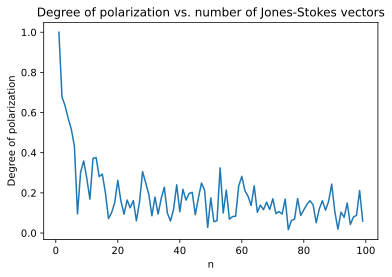

In [10]:
def RandomStokesVector(n):
    ranc = lambda : (random.gauss(0,1) + random.gauss(0,1)*1j)/2
    return sum([JonesStokes([ranc(),ranc()]) for i in range(n)])/n

plt.figure()
plt.plot(range(1,100),[RandomStokesVector(i).DOP() for i in range(1,100)])
plt.title("Degree of polarization vs. number of Jones-Stokes vectors")
plt.xlabel("n")
plt.ylabel("Degree of polarization")
plt.show()

We can multiply Mueller matrices and Stokes vectors. You can use the `@` or `*` operators or the `dot()` function to multiply the objects. If a Stokes vector multiplies a Mueller matrix from the left, it is assumed to be transposed first. The product of two Stokes vectors is the inner product, a scalar. 

In [11]:
m1 = RandomMuellerMatrix(4)
m2 = RandomMuellerMatrix(4)
s1 = RandomStokesVector(4)
s2 = RandomStokesVector(4)
print("m1 = \n",m1)
print("m2 = \n",m2)
print("s1 = ",s1)
print("s2 = ",s2)
print("m1 * s1 = ",m1 * s1)
print("m1 @ s1 = ",m1 * s1)
print("m1.dot(s1) = ",m1.dot(s1))
print("m1 @ m2 = ",m1 * m2)
print("s1 @ m1 = ",s1 * m1)
print("s1 @ s2 = ",s1 * s2)

m1 = 
 [[ 0.66425849 -0.12774046 -0.34152013  0.17560971]
 [-0.36745754  0.08589798  0.32650244 -0.15365229]
 [ 0.16709461 -0.00776626  0.02120448 -0.03469014]
 [ 0.07521512  0.04944892  0.02518614  0.00423142]]
m2 = 
 [[ 1.04944661  0.16150835  0.33502    -0.4016991 ]
 [-0.01747189  0.00821044  0.00606205 -0.14556943]
 [-0.41191462 -0.45214031 -0.41858679 -0.08506713]
 [-0.10146526 -0.023632    0.16391044  0.12833522]]
s1 =  StokesVector(1.7129184519133147,0.5115530003506463,0.8964179315765508,-0.005087377208128116)
s2 =  StokesVector(0.6627656605682924,0.13575465063990294,-0.2008731151370446,-0.34407034654958674)
m1 * s1 =  StokesVector(0.7654364438770493,-0.2920190904547184,0.3014311409057298,0.17668888604606559)
m1 @ s1 =  StokesVector(0.7654364438770493,-0.2920190904547184,0.3014311409057298,0.17668888604606559)
m1.dot(s1) =  [ 0.76543644 -0.29201909  0.30143114  0.17668889]
m1 @ m2 =  [[ 0.82219453  0.25649949  0.39350559 -0.19664788]
 [-0.50602862 -0.202636   -0.28443973  0.0876

Mueller matrix decompositions
--------------------------------

So, now that we can create some physically valid Mueller matrices, we can explore some decompositions. The Cloude decomposition* decomposes a Mueller matrix into an incoherent, positive (convex) sum of Jones-Mueller matrices. 

*S. R. Cloude, “Group theory and polarization algebra,” Optik (Stuttgart) **75**, 26–36 (1986)
and S. R. Cloude and E. Pottier, “A review of target decomposition theorems in radar polarimetry,” IEEE Trans.
Geosci. and Remote Sensing 34, 498–518 (1996).

In [26]:
M = RandomMuellerMatrix(4)
MCD = M.Cloude_Decomposition()
print("M = \n\n",M,"\n\nCloude decomposition =\n")
for m in MCD:
    print(m,"\n")
    
print(f"Purity1 = {(MCD[0][0,0]-MCD[1][0,0])/M[0,0]}")
print(f"Purity2 = {(MCD[0][0,0]+MCD[1][0,0]-2*MCD[2][0,0])/M[0,0]}")
print(f"Purity3 = {(MCD[0][0,0]+MCD[1][0,0]+MCD[2][0,0]-3*MCD[3][0,0])/M[0,0]}")


M = 

 [[ 0.87619267 -0.49295004 -0.07854003  0.3453243 ]
 [ 0.18545068 -0.0581394   0.13476277  0.18688793]
 [ 0.35025441 -0.55689877  0.18998062  0.01390393]
 [ 0.17669189 -0.00926707 -0.15573466  0.27176939]] 

Cloude decomposition =

[[ 0.64502243 -0.49063614  0.03237484  0.27709143]
 [ 0.18716523 -0.07572105  0.22595981  0.27521197]
 [ 0.48531462 -0.55895151  0.05147341  0.1340011 ]
 [ 0.21906737 -0.14165338 -0.2117619   0.2838733 ]] 

[[ 0.19935198 -0.01772609 -0.11721586  0.08341938]
 [ 0.01078128  0.02387787 -0.09226315 -0.09880406]
 [-0.1379275  -0.01489542  0.14717311 -0.12597954]
 [-0.04327048  0.13509565  0.04791443 -0.00737246]] 

[[ 2.20708008e-02  1.27715609e-02  1.89641824e-03 -1.23940876e-02]
 [-1.63699950e-02 -1.12347334e-02 -5.46113631e-05  1.75656536e-02]
 [ 6.19177294e-03  1.39213799e-02 -1.23919103e-03  3.12974558e-03]
 [ 3.74269822e-03  3.14426195e-03  1.29944409e-02 -1.43651712e-03]] 

[[ 0.00974746  0.00264064  0.00440457 -0.00279242]
 [ 0.00387416  0.00493852 

Notice that if we create the random Mueller matrix from less than four Jones-Mueller matrices, the Cloude decomposition will have only as many non-zero matrices as there were Jones-Mueller matrices. In the following, we plot the average magnitude of each element of the Cloude decomposition as a function of how many Jones-Mueller matrices were added.

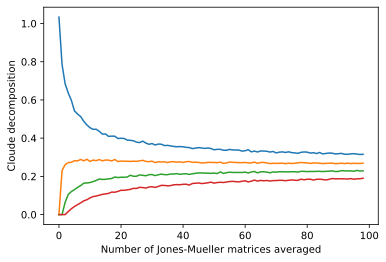

In [13]:
jmax = 100
imax = 100
mCD00sums = []
for i in range(1,imax):
    mCD00sum = np.array([0,0,0,0])
    for j in range(jmax):
        M = RandomMuellerMatrix(i)
        mCD = Cloude_Decomposition(M)
        mCD00sum = mCD00sum + np.array([m[0,0] for m in mCD])
    mCD00sums.append(mCD00sum/jmax)
plt.figure()
plt.plot(mCD00sums)
plt.xlabel("Number of Jones-Mueller matrices averaged")
plt.ylabel("Cloude decomposition")
plt.show()


The Lu-Chipman decomposition*  decomposes a given Mueller matrix $\mathbf{M}$ into the ordered product of three matrices:

$$
\mathbf{M} = \mathbf{M}_\Delta \mathbf{M}_R \mathbf{M}_D
$$
where $\mathbf{M}_\Delta$ is a depolarizer, $\mathbf{M}_R$ is a retarder, and $\mathbf{M}_D$ is a diattenuator.  Notice that if there is only one Jones-Mueller matrix used to create the random matrix, there will be no depolarization.

*S.-Y. Lu and R. A. Chipman, “Interpretation of Mueller
matrices based on polar decomposition,” J. Opt. Soc. Am. A 
<b>13</b>, 1106–1113 (1996)

In [14]:
def printMatrix(name,M):
    print("\n",name,"=\n")
    print(M)

M = RandomMuellerMatrix(4)
depol, ret, diatten = Lu_Chipman_Decomposition(M)
printMatrix("M",M)
printMatrix("Depolarizer",depol)
printMatrix("Retarder",ret)
printMatrix("Diattenuator",diatten)
printMatrix("The product Depolarizer . Retarder .  Diattenuator",depol @ ret @ diatten)


 M =

[[ 1.36307387  0.23101155  0.24094894 -0.0759001 ]
 [ 0.50664129  0.05585856  0.17266958 -0.32658582]
 [ 0.21927138  0.08384675 -0.53056085  0.0372731 ]
 [ 0.02321367 -0.22607425 -0.53376337 -0.04783671]]

 Depolarizer =

[[ 1.          0.          0.          0.        ]
 [ 0.35115907  0.22833982 -0.06248194 -0.00239008]
 [ 0.23562944 -0.06248194  0.37108378  0.22986205]
 [ 0.11997254 -0.00239008  0.22986205  0.39443594]]

 Retarder =

[[ 1.00000000e+00  2.77555756e-17  3.90312782e-18  0.00000000e+00]
 [ 0.00000000e+00  6.05660984e-02  5.64816625e-02 -9.96564885e-01]
 [ 1.38777878e-16  5.87882438e-01 -8.08883122e-01 -1.01160677e-02]
 [-5.55111512e-17 -8.06675887e-01 -5.85250303e-01 -8.21954722e-02]]

 Diattenuator =

[[ 1.36307387  0.23101155  0.24094894 -0.0759001 ]
 [ 0.23101155  1.33928333  0.02075033 -0.00653646]
 [ 0.24094894  0.02075033  1.34103175 -0.00681763]
 [-0.0759001  -0.00653646 -0.00681763  1.32153639]]

 The product Depolarizer . Retarder .  Diattenuator =

[[ 1

The reverse Lu-Chipman decomposition is similar to the Lu-Chipman decomposition, except that the order of the elements us reversed. That is,
$$
\mathbf{M} = \mathbf{M}^\prime_D \mathbf{M}^\prime_R  \mathbf{M}^\prime_\Delta 
$$
where $\mathbf{M}^\prime_D$ is a diattenuator, $\mathbf{M}^\prime_R$ is a retarder, and $\mathbf{M}^\prime_\Delta$ is a depolarizer.

In [15]:
M = RandomMuellerMatrix(3)
diatten, ret, depol = Reverse_Lu_Chipman_Decomposition(M)
printMatrix("M",M)
printMatrix("Diattenuator",diatten)
printMatrix("Retarder",ret)
printMatrix("Depolarizer",depol)
printMatrix("The product Diattenuator . Retarder .  Depolarizer", diatten @ ret @ depol)


 M =

[[ 0.82121834  0.07019336 -0.33338549  0.16953821]
 [-0.06016426 -0.22876827 -0.0587523   0.25824357]
 [ 0.04725512 -0.20219664 -0.39500442 -0.01917191]
 [ 0.24595102  0.21412144 -0.23303981  0.33601811]]

 Diattenuator =

[[ 0.82121834 -0.06016426  0.04725512  0.24595102]
 [-0.06016426  0.78203966 -0.00177581 -0.00924265]
 [ 0.04725512 -0.00177581  0.78117351  0.0072595 ]
 [ 0.24595102 -0.00924265  0.0072595   0.81756262]]

 Retarder =

[[ 1.00000000e+00 -6.93889390e-18 -1.04083409e-16  5.55111512e-17]
 [ 0.00000000e+00 -6.88014554e-01  7.89852772e-02  7.21385680e-01]
 [-5.63785130e-18 -3.33766521e-01 -9.17123353e-01 -2.17909762e-01]
 [ 0.00000000e+00  6.44387991e-01 -3.90699477e-01  6.57356856e-01]]

 Depolarizer =

[[ 1.          0.00126937 -0.33111272  0.12009918]
 [ 0.          0.45483904  0.1155757   0.01921537]
 [ 0.          0.1155757   0.50706535 -0.08925504]
 [ 0.          0.01921537 -0.08925504  0.50476382]]

 The product Diattenuator . Retarder .  Depolarizer =

[[ 0

The symmetric decomposition, introduced by Ossikovski,* is a decomposition that treats the ordering of the Mueller matrix product as symmetric. That is, the Mueller matrix $\mathbf{M}$ is decomposed into 
$$
\mathbf{M} = \mathbf{M}_{D_2} \mathbf{M}_{R_2}  \mathbf{M}_\Delta \mathbf{M}_{R_1} \mathbf{M}_{D_1}
$$
where $\mathbf{M}_{D_1}$ and $\mathbf{M}_{D_2}$ are a diattenuators, $\mathbf{M}^\prime_{R_1}$ and $\mathbf{M}^\prime_{R_2}$ are retarders, and $\mathbf{M}_\Delta$ is a diagonal depolarizer.<br>

*R. Ossikovski, "Analysis of depolarizing Mueller matrices
through a symmetric decomposition," J. Opt. Soc. Am. A, <b>26</b>(5), 1109-1118 (2009).

In [16]:
M = RandomMuellerMatrix(2)
diatten2, ret2, depol, ret1, diatten1 = Symmetric_Decomposition(M)
printMatrix("M",M)
printMatrix("diatten2",diatten2)
printMatrix("ret2",ret2)
printMatrix("depol",depol)
printMatrix("ret1",ret1)
printMatrix("diatten1",diatten1)
printMatrix("The product Diattenuator2 . Retarder2 .  Depolarizer . Retarder1 . Diattenuator1",
            diatten2 @ ret2 @ depol @ ret1 @ diatten1)



 M =

[[ 1.28222844  0.28160502 -0.30326044  0.59784645]
 [ 0.20740857 -0.3588953  -0.12840096 -0.04338726]
 [ 0.01061713 -0.09004395 -0.48026937 -0.40654877]
 [ 0.96294998  0.29123472 -0.25247946  0.8045828 ]]

 diatten2 =

[[1.         0.30659996 0.03912557 0.66912861]
 [0.30659996 0.73191397 0.00715823 0.12242055]
 [0.03912557 0.00715823 0.67673339 0.01562223]
 [0.66912861 0.12242055 0.01562223 0.94299248]]

 ret2 =

[[ 1.          0.          0.          0.        ]
 [ 0.         -0.40030011  0.20105268  0.89405685]
 [ 0.         -0.7617749  -0.61531326 -0.20270321]
 [ 0.          0.50937101 -0.76221218  0.39946685]]

 depol =

[[1.25649942 0.         0.         0.        ]
 [0.         1.25649942 0.         0.        ]
 [0.         0.         0.6111824  0.        ]
 [0.         0.         0.         0.6111824 ]]

 ret1 =

[[ 1.          0.          0.          0.        ]
 [ 0.          0.34312169  0.44605512  0.82662104]
 [ 0.         -0.15335988  0.8948427  -0.41921031]
 [ 0.  

The differential decomposition is simply the matrix logarithm of the Mueller matrix.

In [17]:
M = RandomMuellerMatrix(4)
L = MuellerLog(M)
printMatrix("M",M)
printMatrix("L",L)
printMatrix("MuellerExp(L)",MuellerExp(L))


 M =

[[ 1.32220208 -0.01388141  0.06869785  0.22393515]
 [-0.19715493 -0.08306041 -0.28731878  0.37212531]
 [ 0.11526239 -0.01969714  0.43283695 -0.17665124]
 [-0.79068813 -0.20234881 -0.00674693 -0.5278771 ]]

 L =

[[ 0.51066796  0.35907319  0.22166283  0.55340156]
 [ 1.80104356  0.83609443  0.17820555  4.03071132]
 [-0.15207169 -0.62522204 -1.08294706 -0.6489195 ]
 [-1.99773761 -2.56087337 -0.85779188 -3.19059171]]

 MuellerExp(L) =

[[ 1.32220208 -0.01388141  0.06869785  0.22393515]
 [-0.19715493 -0.08306041 -0.28731878  0.37212531]
 [ 0.11526239 -0.01969714  0.43283695 -0.17665124]
 [-0.79068813 -0.20234881 -0.00674693 -0.5278771 ]]


Other parameters
----------------
One can obtain other parameters associated with a Mueller matrix.

In [18]:
M = RandomMuellerMatrix(4)

print("Tmax = ",M.Tmax())
print("Tmin = ",M.Tmin())
print("diattenuation = ",M.diattenuation())
print("linear diattenuation = ",M.linear_diattenuation())
print("polarization dependent loss = ",M.polarization_dependent_loss())
print("polarizance = ",M.polarizance())
print("depolarization index = ",M.depolarization_index())
print("extinction_ratio = ",M.extinction_ratio())

Tmax =  2.104143782959256
Tmin =  0.9239186018140311
diattenuation =  0.3897625052508914
linear diattenuation =  0.2934819444135831
polarization dependent loss =  3.5744170213248503
polarizance =  0.5140826360457755
depolarization index =  0.5421246298043111
extinction_ratio =  2.277412511045842


There is also a class `CharacterizedMueller` that performs a Lu-Chipman decomposition and extracts parameters from them.  This is treated as a separate class, because initialization performs the decomposition, assigning values to the parameters. Note that the parameters differ from those shown above, due to differences in definition.

N. Ghosh, M.F.G. Wood, and I.A. Vitkin, ''Mueller matrix decomposition for extraction of individual polarization parameters from complex turbid media exhibiting multiple scattering, optical activity, and linear birefringence,'' J. Biomedical Opt. <b>13</b>, 044036 (2008).

In [19]:
parametersM = CharacterizedMueller(M)
print(parametersM)

Mdepol = 
[[ 1.          0.          0.          0.        ]
 [ 0.16078563  0.44735891 -0.12944662 -0.09233423]
 [-0.02019769 -0.12944662  0.48636589  0.09366161]
 [ 0.53897109 -0.09233423  0.09366161  0.22186389]]
Mret = 
[[ 1.00000000e+00  0.00000000e+00  1.21430643e-17  0.00000000e+00]
 [ 1.11022302e-16 -6.07512606e-01  7.81118499e-01  1.44160756e-01]
 [ 5.55111512e-17 -6.02653852e-01 -3.35045045e-01 -7.24260417e-01]
 [ 0.00000000e+00 -5.17432863e-01 -5.26876369e-01  6.74288161e-01]]
Mdiatten = 
[[ 1.51403119  0.41892389 -0.14812676 -0.38832217]
 [ 0.41892389  1.45463769 -0.02133662 -0.05593508]
 [-0.14812676 -0.02133662  1.40183904  0.01977801]
 [-0.38832217 -0.05593508  0.01977801  1.44614376]]
DiattenuationVector = [ 0.41892389 -0.14812676 -0.38832217]
Diattenuation = 0.5901125905726126
CircularDiattenuation = -0.38832216881627346
LinearDiattenuation = 0.44434081824444793
DiattenuationAngle = -0.1699341576297957 rad (-9.73651002729815 deg)
PolarizanceVector = [ 0.16078563 -0.0201